# Лабораторная работа 4

## Задачи и порядок выполнения работы

1. Получить массив отсчётов исходного сигнала из заранее подготовленного звукового WAV-файла с записанной речью или мелодией длительностью 8−15.
2. Построить графики звукового сигнала во временной и частотной области.
3. Добавить нормальный шум мощностью сопоставимой с мощностью звукового сигнала длительность 0,1 −0,5 с начиная с временной метки сигнала 𝑇𝑎𝑢0.
4. Построить графики сигнала во временной и частотной области.
5. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.
6. Реализовать согласованную фильтрацию полученного звукового сигнала с опорным сигналом в виде наложенного нормального шума.
7. Построить график сигнала, полученного в результате согласованной фильтрации.
8. С помощью построенного графика определить временную метку начала шумового фрагмента сигнала и сравнить с исходным значением 𝜏0.

#### 1. Получить массив отсчётов исходного сигнала из заранее подготовленного звукового WAV-файла с записанной речью или мелодией длительностью 8−15.

In [1]:
import IPython

IPython.display.Audio(filename='melody.mp3')

In [2]:
import librosa

(data, sampling_rate) = librosa.load('melody.mp3')
print(data, sampling_rate)

[-9.7843464e-03 -1.5854906e-02 -1.0835272e-02 ...  4.4455609e-15
  4.7876979e-15  3.2063119e-15] 22050


#### 2. Построить графики звукового сигнала во временной и частотной области.

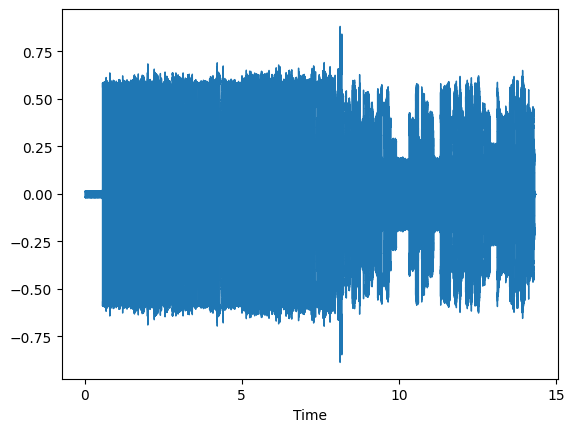

In [3]:
librosa.display.waveshow(data, sr=sampling_rate)

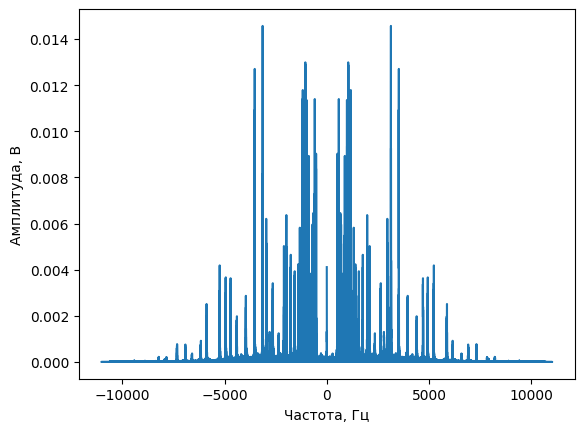

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

def freq_plot(data: np.ndarray):
    sp = fft(data)
    length = len(data)
    freq = fftfreq(length, 1 / sampling_rate)
    plt.plot(freq, np.abs(sp / length))
    plt.xlabel('Частота, Гц')
    plt.ylabel('Амплитуда, В')

freq_plot(data)

#### 3. Добавить нормальный шум мощностью сопоставимой с мощностью звукового сигнала длительность 0,1 −0,5 с начиная с временной метки сигнала 𝑇𝑎𝑢0.

(11025,)


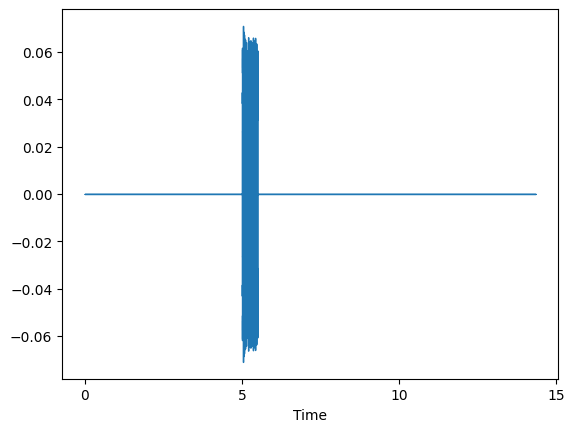

In [5]:
noise_amplitude = 0.020
noise_time = 0.5
noise_length = int(noise_time * sampling_rate)
tau = 5.0
tau_length = int(tau * sampling_rate)
length = len(data)

noise = np.random.normal(0.0, noise_amplitude, noise_length)
print(noise.shape)
padded_noise = np.pad(
    noise,
    (tau_length, length - tau_length - noise_length),
    'constant',
    constant_values=(0, 0)
)

assert data.shape == padded_noise.shape
noisy_signal = data + padded_noise
librosa.display.waveshow(padded_noise)

#### 4. Построить графики сигнала во временной и частотной области.

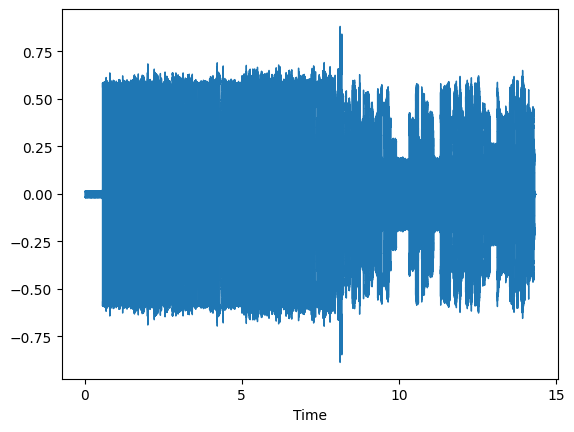

In [6]:
librosa.display.waveshow(noisy_signal, sr=sampling_rate)

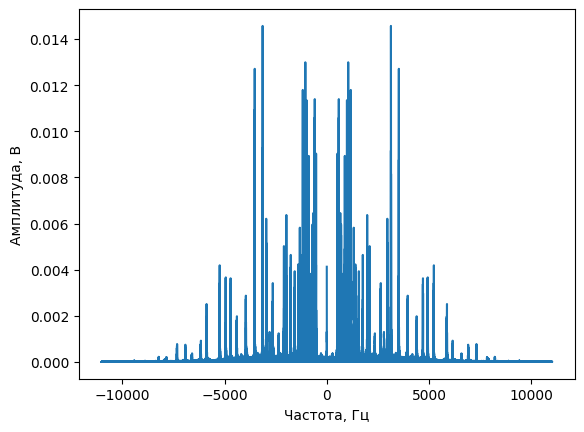

In [7]:
freq_plot(noisy_signal)

#### 5. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.

In [8]:
import soundfile

soundfile.write(
    "noisy_melody.wav",
    data=noisy_signal,
    samplerate=sampling_rate
)

IPython.display.Audio("noisy_melody.wav")

#### 6. Реализовать согласованную фильтрацию полученного звукового сигнала с опорным сигналом в виде наложенного нормального шума.

In [9]:
corr = np.correlate(noisy_signal, noise)

print(corr.shape)

(305224,)


#### 7. Построить график сигнала, полученного в результате согласованной фильтрации.

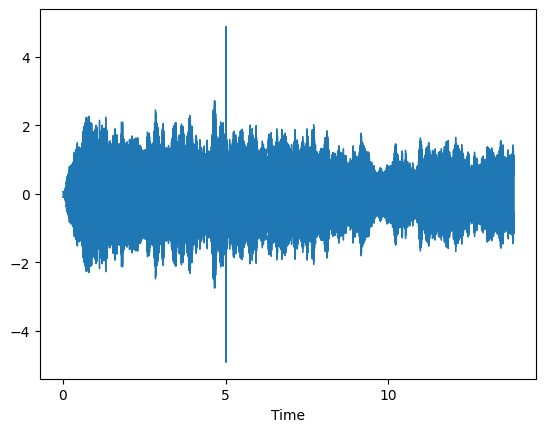

In [10]:
librosa.display.waveshow(corr)

#### 8. С помощью построенного графика определить временную метку начала шумового фрагмента сигнала и сравнить с исходным значением 𝜏0.

In [11]:
max_indices = np.argpartition(corr, -4)[-4:]
print(max_indices, corr[max_indices])
tau_1_length = np.argmax(corr)
tau_1 = tau_1_length / sampling_rate
print(f'Tau0 = {tau}, Tau1 = {tau_1}, DTau = {tau_1 - tau}')

[102642 102641 102416 110250] [2.65373102 2.72799481 2.73251691 4.90807976]
Tau0 = 5.0, Tau1 = 5.0, DTau = 0.0


## Контрольные вопросы

#### 1. Какая информация является результатом работы согласованного фильтра?

Результатом работы согласованного фильтра является накопление информации о наличии и временной задержки опорного сигнала на входе фильтра.

#### 2. Чем обусловлено название согласованного фильтра?

Под согласованным фильтром понимается фильтр, импульсная характеристика которого согласована с опорным сигналом

#### 3. Приведите пример практического использования согласованной фильтрации.

Практическое применение согласованная фильтрация находит в обработке сигналов в радио- и гидролокации, цифровой связи, ультразвуковой диагностике, а также других областях, где есть априорная информация об опорном (зондирующем) сигнале.

#### 4. Как правильно выбрать опорный сигнал при обработке сигналов методом согласованной фильтрации?

Практический эффект от применения согласованной фильтрации существенно зависит от выбора опорного (зондирующего) сигнала, основанного на анализе его функции неопределенности

#### 5. Чему соответствует максимум выходного сигнала результата работы согласованного фильтра?

Когда сигнал совпадает с импульсной характеристикой
